In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from math import pow
from collections import defaultdict

In [2]:
def flip(s,i):
    ''' Flips the i-th bit of string s'''
    ell = list(s)
    if(s[i]=='0'):
        ell[i]='1'
    else:
        ell[i]='0'
    return ''.join(ell)

def hypercube(k):
    ''' The hypercube graph in k dimensions has n=2^k nodes''' 
    binnodes = [] 
    nodes = range(int(math.pow(2,k)))
    edges = defaultdict(set)
    binedges = defaultdict(set)
    representation='#0'+str(k+2)+'b' #bin(i) does not use the same number of bits for each i
    for i in nodes:
        s = format(i, representation)
        u = s[2:] #node binary string id 
        binnodes.append(u)
        for dim in range(k): 
            binedges[u].add(flip(u,dim))
            edges[i].add(int(flip(u,dim),2))
    return binnodes, binedges, nodes, edges  

In [3]:
def cutsize(graph,S):
    edgescut = 0 
    for u in S:
        for v in graph[u]: 
            if v not in S: 
                edgescut+=1
    return edgescut

def degree_sequence(graph): 
    degrees = defaultdict(int)
    for u in graph.keys():
        degrees[u] = len(graph[u])
    return degrees
        
def volume(graph,S):
    volS = 0 
    volSbar = 0 
    degrees = degree_sequence(graph)
    for u in graph.keys(): 
        if u in S:
            volS +=  degrees[u]
        else:
            volSbar +=degrees[u]
    return volS, volSbar 


def conductance(graph,S):
    volS, volSbar = volume(graph,S)
    edgescut = cutsize(graph,S)
    phiS = edgescut/np.minimum(volS,volSbar)
    return phiS, edgescut, volS, volSbar

The "dimension cut" gives conductance $\frac{1}{k}$ where $k$ is the dimension of the hypercube. This is illustrated below:

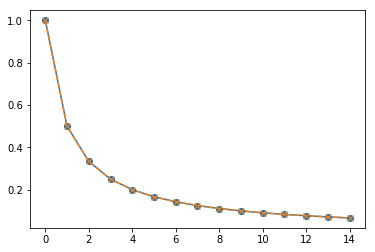

In [4]:
phi_values_1d = [] 
for dimensions in range(1,16): 
    binnodes, binedges, nodes, edges   = hypercube(dimensions)
    one_dim_cut = set(range(int(math.pow(2,dimensions-1)))) #all nodes with first bit 0
    phiS, edgescut, volS, volSbar = conductance(edges,one_dim_cut)
    phi_values_1d.append(phiS)
    
    
plt.plot(1./np.arange(1,16,1),'-o')
plt.plot(phi_values_1d,'--x')

**Claim**: The one dimensional cut of $H_d$ has conductance $\frac{1}{d}$. 

The proof is straight-forward. It is good to think of a d-dimensional hypercube $H_d$ as two copies of $H_{d-1}$ connected, with $2^{d-1}$ extra edges, one for each pair of  $(u,\bar{u})$ where $u,\bar{u}$ are "isomorphic" copies in the first and second $(d-1)$-hypercube respectively. 

** Proof **: Let $(S,\bar{S})$ the a 1d cut. Then $e(S,\bar{S}) = 2^{d-1}$, and $vol(S)=vol(\bar{S}) = 2^{d-1} \cdot d$. 

## Fundamental fact about Laplacian


The number of connected components of a graph is equal to the multiplicity of the zero eigenvalue of the Laplacian.

In [26]:
import networkx as nx

In [27]:
g = nx.Graph() 

In [28]:
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(2,3)
g.add_edge(4,5)

In [29]:
L = nx.laplacian_matrix(g)
print(L)

  (0, 0)	2
  (0, 1)	-1
  (0, 2)	-1
  (1, 0)	-1
  (1, 1)	2
  (1, 2)	-1
  (2, 0)	-1
  (2, 1)	-1
  (2, 2)	2
  (3, 3)	1
  (3, 4)	-1
  (4, 3)	-1
  (4, 4)	1


In [30]:
eigen = filter(lambda x: np.abs(x)<0.000001, nx.laplacian_spectrum(g))
zero_eigenvalues = list(eigen)
print("Number of connected components is ",len(zero_eigenvalues))
for i in range(len(zero_eigenvalues)): 
    print('Connected component', (i+1), 'corresponding to eigenvalue ',zero_eigenvalues[i] ) 
    #What we observe is numerical precision issue
    


Number of connected components is  2
Connected component 1 corresponding to eigenvalue  -1.1102230246251565e-16
Connected component 2 corresponding to eigenvalue  0.0


**Exercise:** The multiplicity of the zero eigenvalue of the graph Laplacian is equal to the number of connected components

# Eigenvalues of some basic